In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalog = pd.read_csv("D:\Yihe\Yihe\COOPER\COOPER2012\Cooper 2012.csv")
#catalog

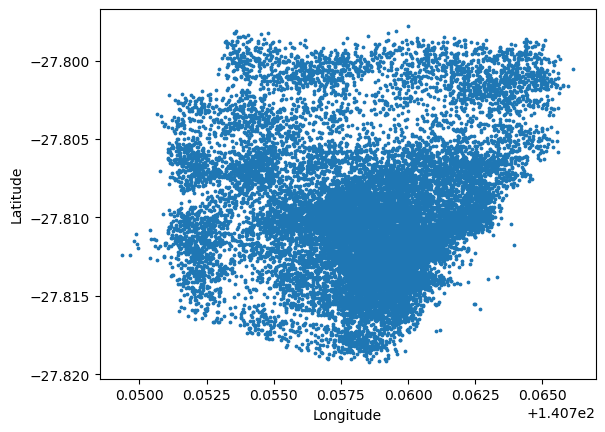

In [3]:
plt.scatter(catalog["Long"],catalog["Lat"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
DT =np.copy(catalog['Time'])

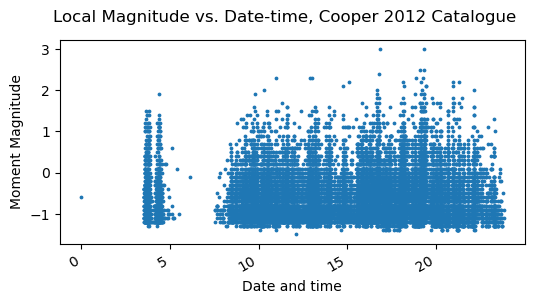

In [5]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(DT,catalog["ML"],s=3)
figure.suptitle("Local Magnitude vs. Date-time, Cooper 2012 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2022,4,21,13),datetime(2022,4,22)])
figure.autofmt_xdate()
plt.show()

In [5]:
# Inj End 20.02635
# Inj Start 2.875574537

injSt = 2.875574537
injEnd = 20.02635 - injSt
print(injEnd)

dt = np.array(catalog['Time'].copy()) - injSt
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, lonf, latf, elef,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['ML'], catalog['Long'], catalog['Lat'], catalog['Elevation'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dt))

17.150775463000002
18147 20735


In [8]:
import statistics
lonref = statistics.median(lonf[1:11])
latref = statistics.median(latf[1:11])
eleref = statistics.median(elef[1:11])
print(xref,yref,zref)

140.75887590000002 -27.811975735 -4.1790875199999995


In [9]:
dist = np.sqrt(((np.array(latf)-latref)*111.1)**2+((np.array(lonf)-lonref)*111.32*np.cos(np.array(latf)))**2+(np.array(elef)-eleref)**2)

2006-12-03 18:57:03


In [10]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [11]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [12]:
Mw = np.copy(catalog['ML'])
print(len(Mw))

20735


In [11]:
print(DT[0],DT[-1])

0.0 23.79721065


In [13]:
#dist = np.sqrt((np.array(X)-xref)**2+(np.array(Y)-yref)**2+(np.array(Z)-zref)**2)
print(len(dist))

18147


In [17]:
#INj end 20.02635
MWN=[]
DTN=[]
dstN=[]
for i in range(len(DT)):
    if DT[i] < 20.02635:
        MWN.append(catalog['ML'][i])
        DTN.append(DT[i])
        dstN.append(dist[i])

In [14]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]

DTN = np.array(dtF)
dstN = np.array(dist)
MWN = np.array(magF)

for z in range(50,len(DTN)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dstN[z-50:z].copy())
    subTime=np.array(DTN[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(MWN[subDstRef[y]])
            rT.append(DTN[subDstRef[y]])
            rstD.append(dstN[subDstRef[y]])
        if y>=45:
            pM.append(MWN[subDstRef[y]])
            pT.append(DTN[subDstRef[y]])
            pD.append(dstN[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [15]:
print(len(rstM))

16245


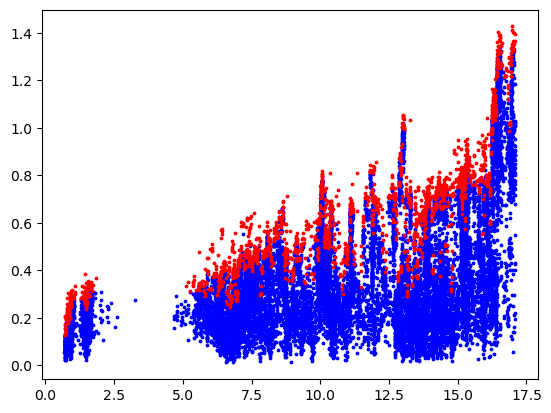

In [16]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [17]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]
percM1 = np.copy(percM)
percT2=np.copy(percT)
quicksort_with_swaps(percT2, percM1, 0, len(percT2)-1)
for i in range(300,len(percM1),30):
    print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM1[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT2[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800


In [23]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
rstM1 = np.copy(rstM)
rstT2=np.copy(rstT)
quicksort_with_swaps(rstT2, rstM1, 0, len(rstT2)-1)
print(len(rstM))
for i in range(300,len(rstM1),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM1[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT2[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

16245


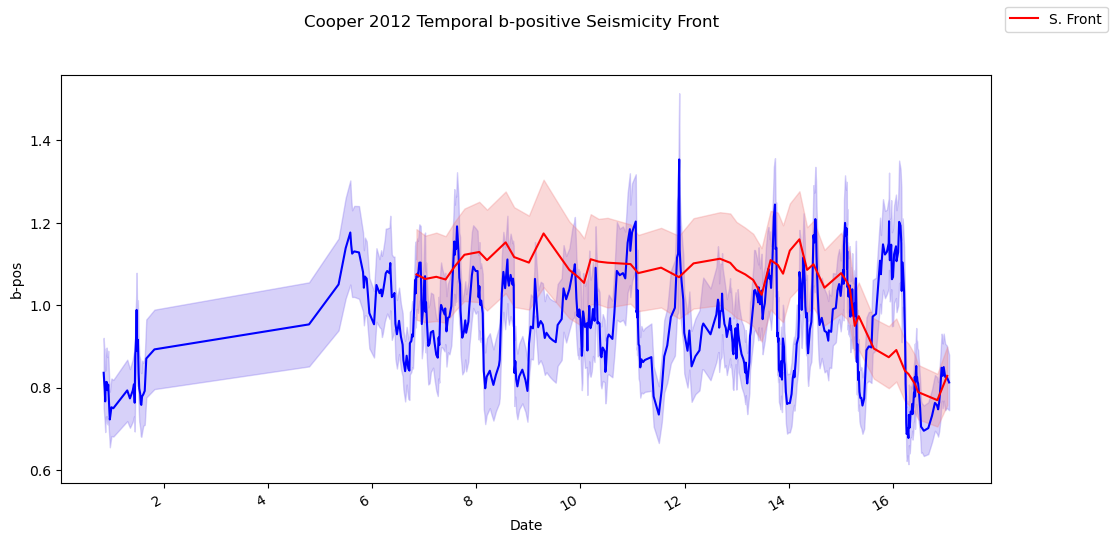

In [19]:
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle("Cooper 2012 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="blue")
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.plot(pdtr,pbp,color="red", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'lightcoral')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [24]:
print(len(rstM),len(rstM1))

16245 16245


In [26]:
rstM2 = np.array(rstM1)
b, Mc, hist = b_value_functions.btrad(rstM2, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM2)
low_b, high_b, std = b_value_functions.bootstrap(rstM2, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM2, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

0.705675322729073 0.6942502924440855 0.7320419117948472 0.009348911918913076
0.9384261179390505 0.9140932446616251 0.9619814547249365 0.012425386519641373


In [27]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

0.7056753227290731 0.7005056981386835 0.7380652319617487 0.00998356163760636
0.8765315474990062 0.8560457306118257 0.8980738474435311 0.011025762662230659


0.7056753227290731 0.7008178196677737 0.7366609986553587 0.009030922455220981
0.8765315474990062 0.856205947234227 0.8975877539951016 0.010431008537546764

In [22]:
percM2 = np.array(percM1)
b, Mc, hist = b_value_functions.btrad(percM2, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM2, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM2, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

0.817895630658745 0.7948428919852841 0.899938900969999 0.0275653646472893
1.011534280316686 0.9399340012079471 1.0892477752421248 0.038267404792358836


0.817895630658745 0.7948428919852841 0.899938900969999 0.0275653646472893
1.011534280316686 0.9399340012079471 1.0892477752421248 0.038267404792358836

In [50]:
# 90th percentile:
# rst: 0.7037779602876297 0.6984392340912096 0.7321022037934057 0.008014795658506754
# perc: 0.8419953930377159 0.7955174025514301 0.8924079049811965 0.025133161052451412
# bp
# rst: 0.8633890654398118 0.842645439486223 0.8837214565772327 0.01037725512857602
# perc: 1.0310692601370968 0.9649361008583948 1.105817667266109 0.034604589725938266
# 80th percentile:
# rst: 0.6976517231657341 0.6923720410213181 0.7242763501056955 0.0074284573422338475
# perc: 0.7958405515620562 0.7665055197597483 0.8392707775346525 0.01841122215279216
# bp
# rst: 0.8555436435050688 0.8363005179565813 0.8758148500960773 0.010494860784128713
# perc: 0.9653984757613421 0.9226947788241682 1.0159227035292888 0.02316928719822519

#Newww
# 90th percentile:
# rst: 0.7061461543511383 0.6950938844972956 0.7319047652548746 0.009528675610299785
# perc: 0.8394549394377818 0.789436933037623 0.8974409741700863 0.027841114495287974
# bp
# rst: 0.9395408500095493 0.9160201688265732 0.965122037089517 0.012355955306911384
# perc: 1.0023476211498632 0.9355464363992817 1.0829056947563078 0.03769832041074386
# 80th percentile:
# rst: 0.6976517231657341 0.6923720410213181 0.7242763501056955 0.0074284573422338475
# perc: 0.7958405515620562 0.7665055197597483 0.8392707775346525 0.01841122215279216
# bp
# rst: 0.8555436435050688 0.8363005179565813 0.8758148500960773 0.010494860784128713
# perc: 0.9653984757613421 0.9226947788241682 1.0159227035292888 0.02316928719822519

Me
